<a href="https://colab.research.google.com/github/NMThanh123/Age_Gender_Detection/blob/main/AI_W9_(31_03_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path
import cv2 as cv

In [ ]:
# create path folder image
img_folder = Path('Image')
img_train = img_folder / 'train'

# list path image
train_img = list(img_train.glob('*.jpg'))

# load image, resize and save
for i in range(len(train_img)):
    image = str(train_img[i])
    img = cv.imread(image)
    img = cv.resize(img, (30, 40))
    cv.imwrite('Image/train_resize/{}.jpg'.format(i+1), img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


                                                             Artificial Neural Network

# Mnist

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import load_model
import numpy as np

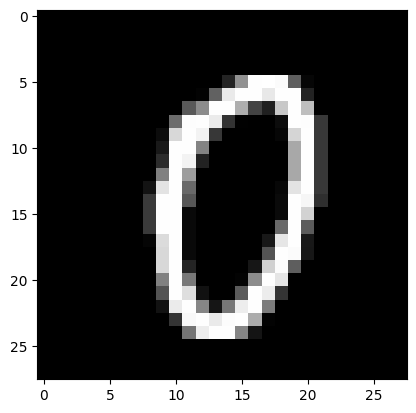

Số: 0


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

digit = train_images[1000]
plt.imshow(digit, cmap='gray')
plt.show()
print('Số:', train_labels[1000])

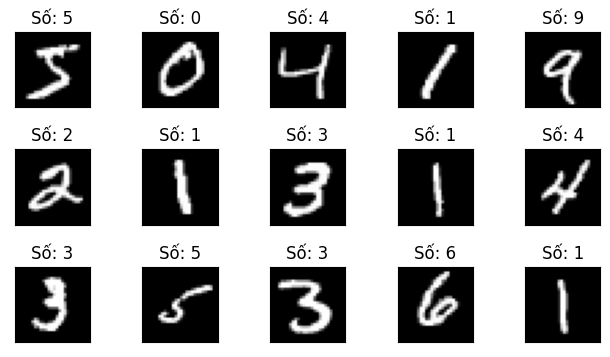

In [ ]:
for i in range(15):
    plt.subplot(4, 5, i+1)
    plt.tight_layout()
    plt.imshow(train_images[i], cmap='gray', interpolation=None)
    plt.title('Số: {}'.format(train_labels[i]))
    plt.xticks([])
    plt.yticks([])

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape = (28*28, )))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 512)               401920    
                                                                 
 dense_59 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X = test_images
y = test_labels

train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32')/255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Loss: ', test_loss)
print('Accuracy: ', test_acc)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2584 - accuracy: 0.9261
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1035 - accuracy: 0.9687
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0686 - accuracy: 0.9795
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0507 - accuracy: 0.9847
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0375 - accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0291 - accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0228 - accuracy: 0.9934
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0173 - accuracy: 0.9950
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0137 - accuracy: 0.9959
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0687 - accuracy: 0.9824

1/1 [==============================] - 0s 17ms/step
5


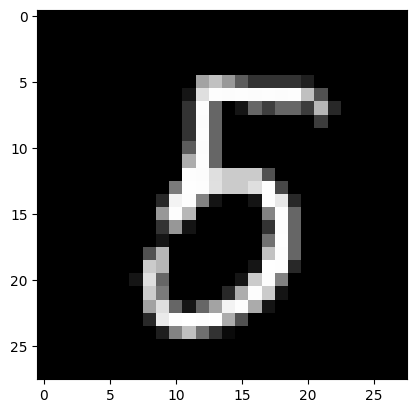

In [ ]:
import numpy as np
X_pred = X[45].reshape(1,28*28) 
X_pred = X_pred.astype('float32')/255
y_pred = model.predict(X_pred)
print(np.argmax(y_pred))

plt.imshow(X[45], cmap='gray')
plt.show()

# Cifar 10

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import load_model
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

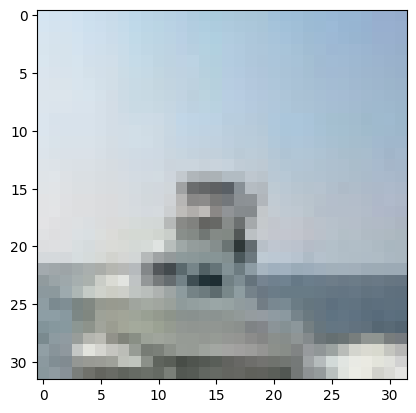

In [ ]:
plt.imshow(X_train[100], interpolation=None)
plt.show()

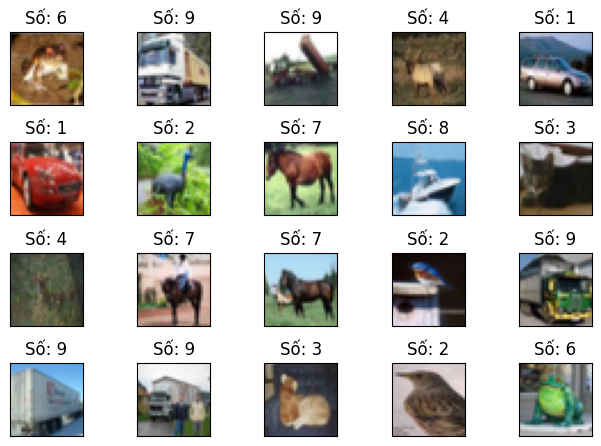

In [ ]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation=None)
    plt.title('Số: {}'.format(y_train[i][0]))
    plt.xticks([])
    plt.yticks([])

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape = (32*32*3, )))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               1573376   
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X = X_test
y = y_test

X_train = X_train.reshape((50000, 32*32*3))
X_train = X_train.astype('float32')/255.0

X_test = X_test.reshape(10000, 32*32*3)
X_test = X_test.astype('float32')/255.0

train_labels = to_categorical(y_train, 10)
test_labels = to_categorical(y_test, 10)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=35)

# test_loss, test_acc = model.evaluate(X_test, test_labels)
# print('Loss: ', test_loss)
# print('Accuracy: ', test_acc)

Epoch 1/35
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8588 - accuracy: 0.3209
Epoch 2/35
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6630 - accuracy: 0.4029
Epoch 3/35
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5812 - accuracy: 0.4322
Epoch 4/35
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5192 - accuracy: 0.4553
Epoch 5/35
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4753 - accuracy: 0.4721
Epoch 6/35
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4355 - accuracy: 0.4836
Epoch 7/35
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3995 - accuracy: 0.4985
Epoch 8/35
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3742 - accuracy: 0.5063
Epoch 9/35
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3429 - accuracy: 0.5215
Epoch 10/35
1563/1563 [==============================] - 7s 4ms/step - loss: 1.319

1/1 [==============================] - 0s 98ms/step
0


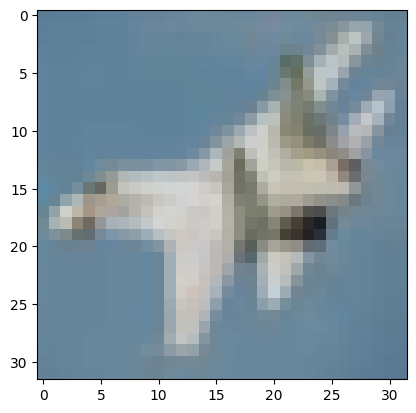

In [ ]:
import numpy as np
X_pred = X[10].reshape(1,32*32*3) 
X_pred = X_pred.astype('float32')/255.0
y_pred = model.predict(X_pred)
print(np.argmax(y_pred))

plt.imshow(X[10], cmap='gray')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Model_AI/model_cifar10.h5')

In [ ]:
md = load_model('/content/drive/MyDrive/Colab Notebooks/Model_AI/model_cifar10.h5')

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
from pathlib import Path

# Class labels
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

path = Path('/content/drive/MyDrive/Colab Notebooks/Image')
test = path / 'test'

test_list =  list(test.glob('*.jpg'))

for i in range(len(test_list)):
    string = str(test_list[i])
    img = load_img(test_list[i], target_size=(32, 32))
    img = img_to_array(img)
    img = img.reshape(1, 32*32*3)
    img = img.astype('float32')/255.0
    label = np.argmax(md.predict(img))
    print('true class: {}'.format(string.split('/')[-1][:-4]))
    print('predict class: {}'.format(CLASS_NAMES[label]))

1/1 [==============================] - 0s 26ms/step
true class: truck
predict class: truck
1/1 [==============================] - 0s 25ms/step
true class: frog
predict class: frog
1/1 [==============================] - 0s 30ms/step
true class: ship
predict class: ship
1/1 [==============================] - 0s 26ms/step
true class: cat
predict class: frog
1/1 [==============================] - 0s 24ms/step
true class: dog
predict class: dog
